C:\Users\Addisu\AppData\Local\Temp\ipykernel_3296\3531253295.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_data = pd.read_csv(file, parse_dates = ['point'],


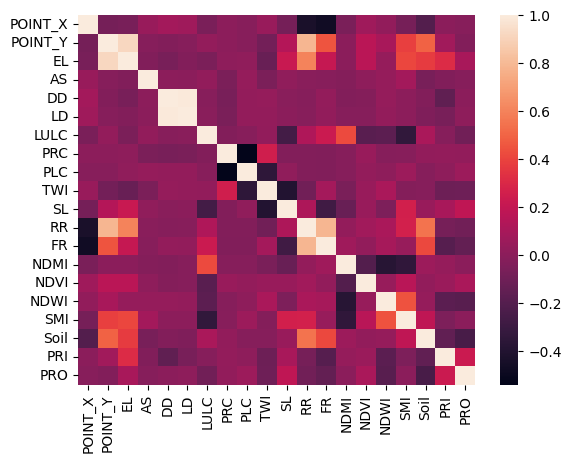

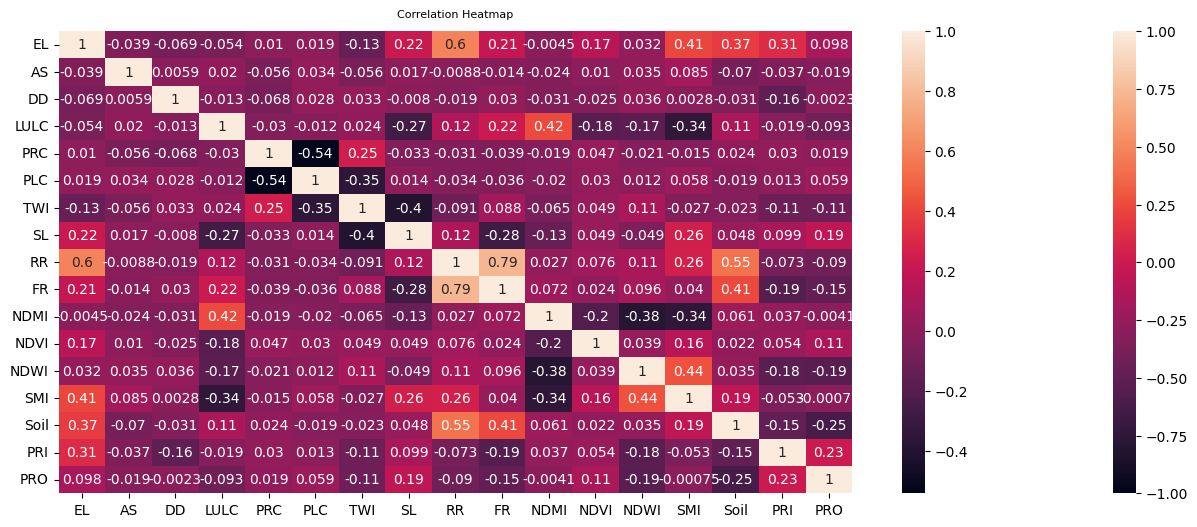

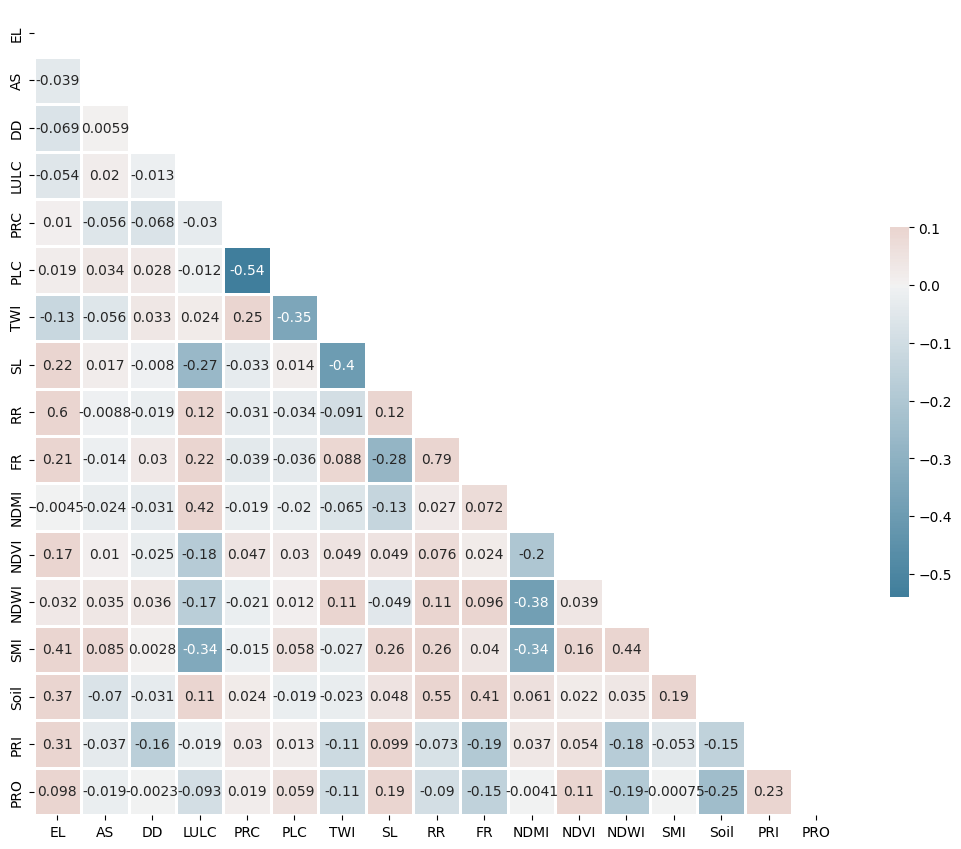

In [41]:
import pandas as pd        
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 19 13:00:25 2023

@author: Addisu
"""

#%%
import pandas as pd
#Step 1: Read and explore data
file='C:/Users/Addisu/Desktop/kidi/TMFD/dd.csv'
raw_data = pd.read_csv(file, parse_dates = ['point'],
                       index_col = 'point')
df = raw_data.copy()

df1=df.drop(["LD","POINT_X","POINT_Y"], axis=1)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
#import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import metrics, svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes  import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score


# Read data from  csv files
#X = df1.drop(["FR"], axis=1)
#y = df1["FR"]




# Check missing values
df1.isnull().sum()
# Replace missing values by interpolation

def replace_missing (attribute):
    return attribute.interpolate(inplace=True)
replace_missing(df1['RR'])
replace_missing(df1['AS'])
#replace_missing(df1['LULC'])
#replace_missing(df1['LD'])
#replace_missing(df1['NDVI'])
#replace_missing(df1['NDWI'])
#replace_missing(df1['NDMI'])
replace_missing(df1['EL'])
replace_missing(df1['PRI'])
replace_missing(df1['PRO'])
replace_missing(df1['SL'])
#replace_missing(df1['Soil'])
replace_missing(df1['TWI'])
#replace_missing(df1['SMI'])
replace_missing(df1['PLC'])
replace_missing(df1['PRC'])
#replace_missing(df['FR'])  

df

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df1.corr()

sns.heatmap(df.corr())



# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.

heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#df.to_excel("C:/Users/temnit/Desktop/flood/missing out.xlsx",index=False)




import matplotlib.pyplot as plt
import seaborn as sns

# Say your matrix object (e.g. np.array) is corr_mat

# Get the upper triangle without the diagonal 
corr_mat = np.triu(df1.corr(), k=1)

# Plot the heatmap
ax = sns.heatmap(df1.corr())


# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.1, center=0,
            square=True, linewidths=1,annot=True, cbar_kws={"shrink": .4})

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=10);

results_path = 'correlation.png'
    #print(results_path)
plt.savefig(results_path,bbox_inches='tight', dpi=400,format="png")



def variance_inflation_factor(exog, exog_idx):
    """
    exog : ndarray, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    """
    k_vars = exog.shape[1]
    x_i = exog[:, exog_idx]
    mask = np.arange(k_vars) != exog_idx
    x_noti = exog[:, mask]
    r_squared_i = OLS(x_i, x_noti).fit().rsquared
    vif = 1. / (1. - r_squared_i)
    return vif



from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

#variance_inflation_factors(df['PRI'])


import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df1, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})





In [27]:
Y=calculate_vif(df1=df1, features=['RR','AS','DD','LULC','PRI','NDWI','NDVI','NDMI','EL','PRO','SL','Soil','TWI','SMI','PLC','PRC'])
Y.to_excel('Y.xlsx', index=True)
Y

,VIF,Tolerance
RR,2.165522,0.461783
AS,1.032769,0.968271
DD,1.036887,0.964425
LULC,1.428553,0.700009
PRI,1.414713,0.706857
NDWI,1.515978,0.659640
NDVI,1.109774,0.901085
NDMI,1.455958,0.686833
EL,2.441985,0.409503
PRO,1.221761,0.818491


In [10]:
variance_inflation_factors(df['PRI'])

const    2.401833
PRI      1.000000
Name: VIF, dtype: float64

In [20]:
calculate_vif(df=df, features=['PRI','LD','RR'])

,VIF,Tolerance
PRI,1.225406,0.816056
LD,1.225126,0.816243
RR,1.000276,0.999724


In [24]:
calculate_vif(df=df, features=['Soil','PRI'])

,VIF,Tolerance
Soil,1.222231,0.818176
PRI,1.222231,0.818176


In [42]:
df1


,EL,AS,DD,LULC,PRC,PLC,TWI,SL,RR,FR,NDMI,NDVI,NDWI,SMI,Soil,PRI,PRO
point,,,,,,,,,,,,,,,,,
1,2336,128.4800,36.2925,40,0.032817,-0.073481,6.25436,13.26860,93.6292,4,0,-1,-0.068112,0.197059,5,877.235,2555.030
2,2301,195.7510,56.5423,40,0.196650,-0.441133,6.49994,26.89770,93.4440,4,0,0,-0.054569,0.267121,5,766.795,2705.100
3,2357,47.2457,0.0000,60,-0.129778,0.614302,4.07815,26.28560,93.8191,4,0,-1,-0.051317,0.265721,5,938.376,2304.940
4,2253,169.9920,122.6870,50,0.128783,0.128783,6.46843,5.43727,92.9948,5,0,0,-0.031480,0.346426,5,289.357,2641.820
5,2256,188.1300,120.9300,40,0.212594,0.000000,6.16444,5.15503,93.1303,5,0,0,-0.046095,0.253077,5,521.420,2707.410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,2651,105.2550,0.0000,40,0.063778,0.063778,7.21722,2.57751,88.1385,3,0,0,-0.025416,0.347815,1,1183.550,1415.910
792,2495,166.6070,24.2782,60,-0.063778,-0.063778,5.68010,11.82570,87.1454,1,0,-1,-0.048098,0.399209,8,585.984,500.601
793,2430,147.5290,60.4799,50,0.063778,-0.042519,7.75687,4.50143,87.3196,2,0,0,-0.042952,0.260844,8,614.202,1001.200
